Berikut Link Repository Github : https://github.com/rizqatasyaa/Cust-Review_TextAnalytics

# Pengumpulan Data 

**Deskripsi Data** <br>
Dataset PRDECT-ID merupakan kumpulan data review produk Indonesia yang diberi label emosi dan sentimen. Data dikumpulkan dari salah satu e-commerce besar di Indonesia yaitu Tokopedia. Dataset berisi review produk dari 29 kategori produk di Tokopedia yang menggunakan bahasa Indonesia. Setiap ulasan produk dianotasi dengan satu emosi, yaitu Anger, Fear, Happy, Love, dan Sadness. Kelompok anotator melakukan proses anotasi untuk memberikan label emosi dengan mengikuti kriteria anotasi emosi yang dibuat oleh pakar psikologi klinis. Atribut-atribut lain yang berkaitan dengan review produk juga diekstraksi, seperti Location, Price, Overall Rating, Number Sold, Total Review, and Customer Rating untuk mendukung penelitian lebih lanjut. <br>
1. **Sumber**: <br>
Dataset yang digunakan adalah dataset yang berisi data ulasan produk online yang dibuat oleh customer ketika selesai membeli suatu produk di platform Tokopedia. Data ini diambil dari hasil penelitian Rhio Sutoyo, et al. yang berjudul: "PREDECT-ID: Indonesian Product Reviews Dataset for Emotions Classification Tasks" atau berikut link download data nya https://data.mendeley.com/datasets/574v66hf2v/1  <br>
2. **Jumlah Sampel**: <br>
Dataset ini terdiri dari 5.400 ulasan, dengan 2.579 ulasan positif dan 2.821 ulasan negatif. <br>
3. **Fitur-fitur**: <br>
- Category: Klasifikasi produk berdasarkan kategori <br>
- Product Name: Nama produk yang diulas <br>
- Location: Nama kota toko atau penjual produk <br>
- Price: Harga dalam IDR dari produk yang diulas <br>
- Overall Rating: Peringkat produk secara keseluruhan <br>
- Number Sold: Jumlah total produk yang terjual <br>
- Total Reviews: Jumlah total ulasan yang diberikan oleh pelanggan <br>
- Customer Rating: Peringkat produk (antara 1 hingga 5) dari pelanggan <br>
- Customer Review: Ulasan produk yang diberikan oleh pelanggan <br>
- Sentiment: Label sentimen dari ulasan (positive atau negative). <br>
- Emotion: Label emosi (Anger, Fear, Happy, Love, Sadness) <br>


Berikut adalah kode untuk mengumpulkan data dan ringkasan dari dataset:

In [1]:
# Library
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


#Importing required libraries from nltk
nltk.download('stopwords')
nltk.download('punkt') 

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rizqatasyaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rizqatasyaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Membaca data csv
data = pd.read_csv('D:/KULIAH S2/SMT 2/Analitik Text/UTS/dataset/PRDECT-ID Dataset.csv') 

# Tampilkan 5 data ulasan random
data.sample(n=5, random_state=48)


,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
3265,Gaming,STICK PS USB LAPTOP GAMEPAD PC SINGLE HITAM R-...,Kota Surabaya,39300,4.8,767,308,1,Masak barangnya yang di kirim rusak. Gak bisa ...,Negative,Fear
718,Office & Stationery,Pengikat Kabel / Penggulung Cable / Binder Kli...,Jakarta Utara,900,4.9,20700,3246,1,"pihak toko tidak jelas, di minta barang a yg d...",Negative,Anger
1218,Body Care,L'Oreal Professionnel Serioxyl Denser Hair Ser...,Jakarta Barat,381000,4.9,3517,1804,5,"Paket cepat datang, packing aman sekali, dapet...",Positive,Happy
3294,Gaming,PS2 fat hardisk 60gb ekternal paket lengkap - ...,Jakarta Barat,610000,4.6,1400,329,1,"Banyak game yang rusak,,, Beberapa game tidak ...",Negative,Fear
629,Office & Stationery,Correction Tape / Pita Koreksi Joyko CT-522,Jakarta Utara,5640,4.9,11100,2134,5,"barangnya sudah sampai, tidak ada yang rusak a...",Positive,Happy


In [3]:
# Tampilkan informasi terkait dataset
data.info()

# Hitung jumlah kategori sentimen
data.Sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


Negative    2821
Positive    2579
Name: Sentiment, dtype: int64

Dari hasil di atas, terdapat 11 fitur yang terdapat dalam dataset ulasan customer tokopedia tersebut. Karena task yang akan dilakukan adalah analisis sentimen maka fitur yang digunakan untuk melakukan klasifikasi sentimen hanya "Customer Review" dan "Sentiment". Sisanya dapat digunakan untuk melakukan analisis lebih lanjut.

Jumlah ulasan berjumlah 5400 data, dengan ulasan yang memiliki sentimen negatif berjumlah 2821 ulasan dan ulasan positif berjumlah 2579 ulasan. Perbandingan ulasan bersentimen positif dan negatif cukup seimbang, sehingga untuk saat ini tidak perlu dilakukan balancing terhadap dataset.

# Pra-Pemrosesan Teks (Text Pre-processing) 

Dalam bagian ini, akan dilakukan pra-pemrosesan text yang digunakan untuk mempersiapkan data agar siap untuk digunakan sebagai data training model klasifikasi sentimen yang akan dibuat nanti. Tahapan ini terdiri dari: <br>
1. Tokenisasi: Memecah teks menjadi unit-unit kata.
2. Penghapusan Stopwords: Menghapus kata-kata umum yang tidak memberikan makna signifikan.
3. Stemming: Mengubah kata ke bentuk dasarnya.
4. Lowercasing: Mengubah semua teks menjadi huruf kecil.
5. Penghapusan Tanda Baca dan Karakter Khusus: Menghapus tanda baca dan karakter khusus dari teks.

Berikut adalah kode untuk pra-pemrosesan dan contoh teks sebelum dan sesudah pra-pemrosesan:

**1. TOKENISASI**

In [4]:
# Buat dataframe baru untuk menampung data yang belum dilakukan preprocessing
df =  data.copy()

# Tokenization Text
tokenizer=ToktokTokenizer()

# Setting Indonesia stopwords
stopword_list=nltk.corpus.stopwords.words('indonesian')
print(stopword_list)


['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

**2. PENGHAPUSAN STOPWORDS**

In [5]:
# Penghapusan Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Gunakan function pada kolom Customer Review
data['Customer Review']=data['Customer Review'].apply(remove_stopwords)

**3. STEMMING**

In [6]:
#Stemming Text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

# Gunakan function pada kolom Customer Review
data['Customer Review']=data['Customer Review'].apply(simple_stemmer)

**4. LOWERCASSING**

In [7]:
all_words = []

def lower(series):
    for review in series:
        words = review.lower().split()  # Ubah ke lower case dan split ke words
        all_words.extend(words)  # Add words ke all_words list

lower(data['Customer Review'])
print(all_words[:20])

['alhamdulillah', 'berfungsi', 'baik.', 'packag', 'aman.', 'respon', 'cepat', 'ramah.', 'seller', 'kurir', 'amanah', 'barang', 'bagu', 'respon', 'cepat', ',', 'harga', 'bersa', 'yg', '.']


**5. PENGHAPUSAN TANDA BACA DAN KARAKTER KHUSUS**

In [8]:
# Hapus html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Hapus square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Hapus noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Gunakan function pada kolom Customer Review
data['Customer Review']=data['Customer Review'].apply(denoise_text)

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [9]:
# Hapus special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Gunakan function pada kolom Customer Review
data['Customer Review']=data['Customer Review'].apply(remove_special_characters)

**PRA-PEMROSESAN LENGKAP**

In [10]:
# Pra-pemrosesan lengkap
def preprocess(text):
    text = denoise_text(text)                    # Hapus HTML dan teks dalam tanda kurung
    text = remove_special_characters(text)       # Hapus karakter khusus
    text = text.lower()                          # Lowercasing
    text = remove_stopwords(text)                # Hapus stopwords
    text = simple_stemmer(text)                  # Stemming
    return text

# Terapkan pra-pemrosesan ke seluruh dataset
data['cleaned_review'] = data['Customer Review'].apply(preprocess)

In [11]:
# Tampilkan contoh sebelum dan sesudah pra-pemrosesan
example_review = df['Customer Review'][0]
print("Sebelum pra-pemrosesan:")
print(example_review)
print("\nSesudah pra-pemrosesan:")
processed_review = preprocess(example_review)
print(processed_review)

Sebelum pra-pemrosesan:
Alhamdulillah berfungsi dengan baik. Packaging aman. Respon cepat dan ramah. Seller dan kurir amanah

Sesudah pra-pemrosesan:
alhamdulillah berfungsi packag aman respon cepat ramah seller kurir amanah


# Rekayasa Fitur (Feature Engineering)

**1. TF-IDF (Term Frequency-Inverse Document Frequency)** 
<br>
TF-IDF adalah teknik statistik yang digunakan untuk mengevaluasi pentingnya sebuah kata dalam sebuah dokumen relatif terhadap seluruh korpus (kumpulan dokumen).
<br>
- Term Frequency (TF): Mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen.
- Inverse Document Frequency (IDF): Mengukurseberapa umum atau jarang kata dalam seluruh korpus.


In [12]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Customer Review'])

# Tampilkan fitur
print(tfidf_vectorizer.get_feature_names_out())
print(tfidf_matrix.toarray())
print(tfidf_matrix.shape)


['000' '0000' '005' ... 'zonkkkkkkk' 'zoom' 'zooonk']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5400, 8886)


**Interpretasi** <br>
- Fitur :
    Pada daftar fitur yang dihasilkan oleh TfidfVectorizer. Setiap elemen dalam array ini adalah sebuah token (kata) unik yang ditemukan dalam kolom 'Customer Review'. Token-token ini diurutkan secara alfabetis dan mencakup semua kata dari '000' hingga 'zooonk'. Ini menunjukkan bahwa teks diubah menjadi serangkaian token, dan setiap token dianggap sebagai fitur unik.
<br>
- Matriks TF-IDF:
    Ini adalah representasi numerik dari teks dalam bentuk matriks TF-IDF (Term Frequency-Inverse Document Frequency). Setiap baris dalam matriks ini mewakili satu dokumen (atau satu ulasan pelanggan), dan setiap kolom mewakili satu fitur (token). Nilai dalam matriks menunjukkan seberapa penting sebuah token dalam dokumen tertentu, dihitung berdasarkan frekuensi token dalam dokumen dan seberapa jarang token tersebut muncul dalam seluruh korpus (kumpulan dokumen).
<
- Dimensi Matriks:
    Matriks TF-IDF ini memiliki 5400 baris dan 8886 kolom. Ini berarti ada 5400 dokumen (ulasan pelanggan) dan 8886 fitur unik (token) yang dihasilkan oleh TfidfVectorizer.

**2. Word2Vec** <br>
Word2Vec adalah teknik pembelajaran mendalam yang digunakan untuk memetakan kata-kata ke dalam vektor-vektor numerik yang disebut embeddings. Teknik ini belajar dari konteks kata-kata dalam korpus teks.
<br>
Word2Vec bekerja dengan memetakan setiap kata dalam korpus teks ke dalam vektor numerik berdimensi tinggi. Vektor ini adalah representasi dari kata dalam ruang vektor, dan kata-kata yang muncul dalam konteks yang mirip di dalam teks akan memiliki vektor yang dekat dalam ruang vektor.

In [13]:
# Tokenisasi untuk Word2Vec
tokenized_reviews = [review.split() for review in data['Customer Review']]

# Inisialisasi dan pelatihan model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Ambil contoh kata yang ada dalam dataset setelah pra-pemrosesan
kata = 'pelanggan'  # Misalnya, kita ingin mengambil embedding untuk kata 'pelanggan'

# Periksa apakah kata ada dalam model Word2Vec
if kata in word2vec_model.wv:
    word_embedding = word2vec_model.wv[kata]
    print(f"Word2Vec Embedding for '{kata}':\n", word_embedding)
else:
    print(f"Kata '{kata}' tidak ditemukan dalam korpus.")

Word2Vec Embedding for 'pelanggan':
 [-0.11107337  0.1875638   0.04043874 -0.01705649  0.05542781 -0.26852608
  0.02792248  0.3248475  -0.04521837 -0.1399939  -0.00458212 -0.2088574
 -0.04501867  0.09832066  0.0445672  -0.07058062  0.03016608 -0.15017888
 -0.07633508 -0.26260793  0.11178556  0.1430127   0.11251274 -0.04874519
 -0.06436776  0.02571917 -0.0935771  -0.07899705 -0.11127611  0.03774868
  0.11185095  0.0058574   0.07626145 -0.11006989 -0.11844565  0.1824165
  0.0276489  -0.07278546 -0.0315763  -0.23618986  0.01982977 -0.17714663
 -0.02224403 -0.04405782  0.11158125 -0.00721488 -0.11675141 -0.05310387
  0.02518412  0.08612746  0.0240059  -0.13461605 -0.0318893  -0.03410039
 -0.05970927  0.03349598  0.09282891 -0.00380347 -0.10015295  0.06611104
 -0.00365734  0.01452292  0.03731526  0.02840615 -0.15176478  0.11789068
  0.03618486  0.11439036 -0.2139835   0.16878428 -0.03122827  0.02843219
  0.15670362 -0.02170295  0.13854916  0.0445193   0.02129357 -0.03587166
 -0.18206428  0.

**Interpretasi** <br>
Setiap nilai dalam vektor ini menunjukkan sebuah fitur dari kata "pelanggan" yang telah dipelajari oleh model Word2Vec. Nilai-nilai ini merepresentasikan posisi kata "pelanggan" dalam ruang vektor dengan 100 dimensi, yang memetakan hubungan semantik antara kata tersebut dengan kata-kata lainnya dalam korpus.

# Analisis Data Eksploratif dan Visualisasi 

- Gunakan word clouds untuk memvisualisasikan kata-kata yang paling sering muncul.
- Plot distribusi panjang teks (misalnya, jumlah kata per dokumen).
- Visualisasikan frekuensi dari kata-kata teratas menggunakan bar plot.


Berikut adalah kode dan visualisasi EDA.

**1. WORD CLOUDS**

In [14]:
# Buat data copy yang sudah pre-process untuk visualisasi
df_vis = data.copy()

from collections import Counter
df_vis['temp_list'] = df_vis['cleaned_review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,barang,1485
1,yg,1182
2,sesuai,1097
3,nya,950
4,bagu,875
5,cepat,779
6,ga,709
7,pengiriman,665
8,beli,604
9,banget,571


**Interpretasi** <br>
Dapat dilihat diatas, kata-kata yang paling sering muncul dalam ulasan pelanggan yaitu "barang" , "yg" dan "sesuai". Kata-kata yang sering muncul ini menunjukkan bahwa ulasan pelanggan sangat fokus pada produk (barang), kecepatan dan keamanan pengiriman, serta kesesuaian antara produk yang diterima dan ekspektasi.

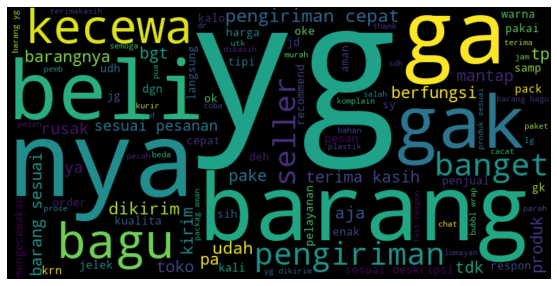

In [15]:
# Gabungkan semua ulasan menjadi satu teks
all_reviews = ' '.join(data['cleaned_review'])

# Buat dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Interpretasi** <br>
Pada visualisasi word clouds diatas, untuk data gabungan kata yang paling sering muncul dan paling terlihat yaitu "nya","yg","ga","barang","bagu","kecewa"

In [16]:
# Split dataframe menjadi positive and negative 
df_vis_pos = df_vis[df_vis['Sentiment'] == 'Positive']
df_vis_neg = df_vis[df_vis['Sentiment'] == 'Negative']

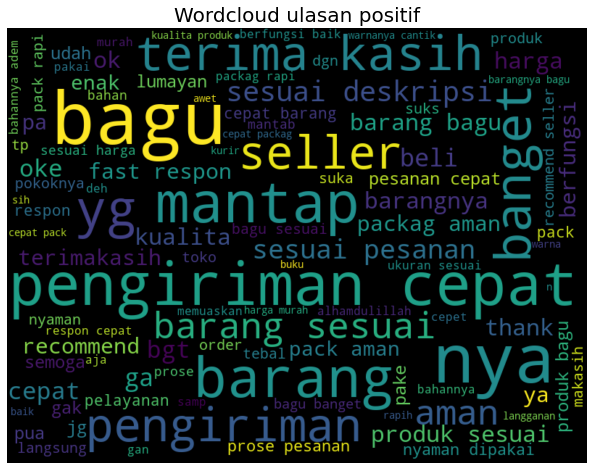

In [17]:
# Buat WordCloud plot untuk positive reviews
txt = ' '.join(rev for rev in df_vis_pos['Customer Review'])
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title(label="Wordcloud ulasan positif", fontsize=20)
plt.show()

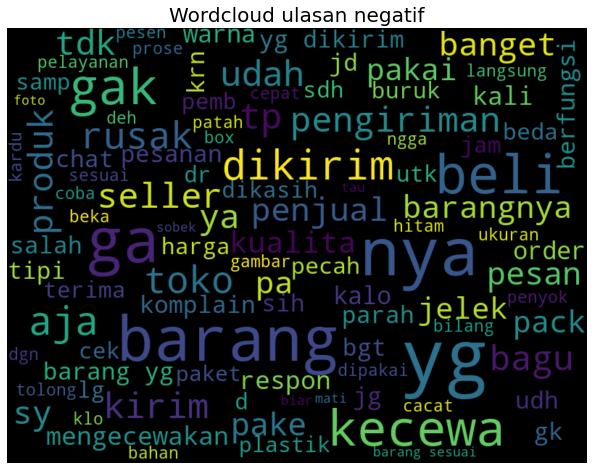

In [18]:
# Buat WordCloud plot untuk negative reviews
txt = ' '.join(rev for rev in df_vis_neg['Customer Review'])
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title(label="Wordcloud ulasan negatif", fontsize=20)
plt.show()

**2. PLOT DISTRIBUSI PANJANG TEXT**

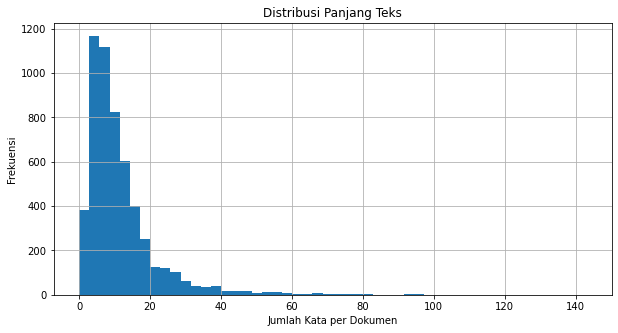

In [19]:
# Menghitung jumlah kata per dokumen
data['word_count'] = data['cleaned_review'].apply(lambda x: len(x.split()))

# Plot distribusi panjang teks
plt.figure(figsize=(10, 5))
data['word_count'].hist(bins=50)
plt.xlabel('Jumlah Kata per Dokumen')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Teks')
plt.show()


**Interpretasi** <br>
Distribusi ini menunjukkan adanya beberapa kata yang sangat umum digunakan dalam ulasan, sementara sebagian besar kata bersifat lebih spesifik dan digunakan lebih jarang.

Pola ini mengikuti distribusi long tail, yang umum dalam analisis teks dan frekuensi kata. Ini berarti bahwa selain beberapa kata yang sangat umum, ada banyak kata yang hanya muncul beberapa kali.

Dari grafik ini, dapat menyimpulkan bahwa sebagian besar informasi dalam ulasan pelanggan disampaikan menggunakan sejumlah kecil kata yang sangat sering digunakan, sementara sisanya menggunakan banyak kata yang jarang muncul.

**3. VISUALISASI FREKUENSI DARI KATA-KATA TERATAS MENGGUNAKAN BAR PLOT**

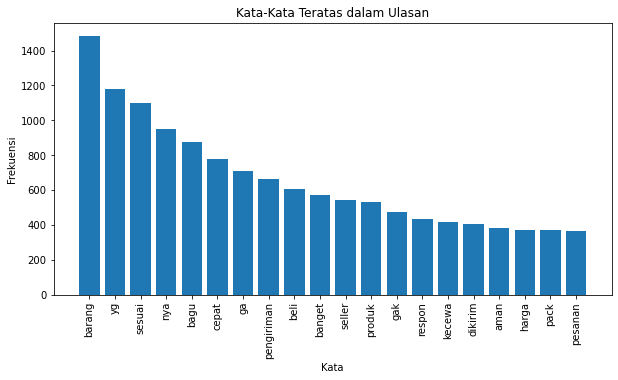

In [20]:
# Menghitung frekuensi kata
word_freq = Counter(" ".join(data['cleaned_review']).split())

# Mendapatkan kata-kata teratas
common_words = word_freq.most_common(20)

# Plot frekuensi kata teratas
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-Kata Teratas dalam Ulasan')
plt.show()


**Interpretasi** <br>
Pada grafik diatas dapat dilihat, Kata-kata dengan frekuensi tinggi seperti "barang," "sesuai," "cepat," dan "pengiriman" menunjukkan bahwa ulasan pelanggan banyak membahas tentang kualitas produk, kesesuaian produk dengan deskripsi, kecepatan pengiriman, dan pengalaman pembelian. Terdapat kata-kata seperti "bagus," "cepat," "aman" (positif) dan "kecewa" (negatif) menunjukkan adanya campuran ulasan positif dan negatif, mencerminkan berbagai pengalaman pelanggan.

# Klasifikasi Teks (Naive Bayes)

In [21]:
# Impor modul sklearn untuk split data 
from sklearn.model_selection import train_test_split

In [22]:
# Split data ke train dan split
X = data['cleaned_review']
y = data['Sentiment'] 


X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state= 42)

In [23]:
# Impor modul pipeline, TfidfVectorizer, dan Linear SVC dibawah ini
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [24]:
# Bangun sebuah pipeline  
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                       ('clf', MultinomialNB())])

In [25]:
# fit training data dengan pipeline
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
# Menampilkan data X_Train
X_train.head()

2252    harganya murc bgt drpd jajan yg mend jajan ema...
4121    maaf bintang nya cmn 2 casan nya gk pakai coba...
3937    penjual responsif pengiriman pengen cancel men...
2874    kecewa banget sih pesan maroon hijau armi mint...
3811    baiknya sblm dikirimkan cek part hilang berfun...
Name: cleaned_review, dtype: object

In [27]:
# Prediksi menggunakan model yang sudah dibangun dengan data test
prediction = text_clf.predict(X_test)

In [28]:
unique_values, value_counts = np.unique(prediction, return_counts=True)
value_counts_dict = dict(zip(unique_values, value_counts))
print(value_counts_dict)

{'Negative': 813, 'Positive': 807}


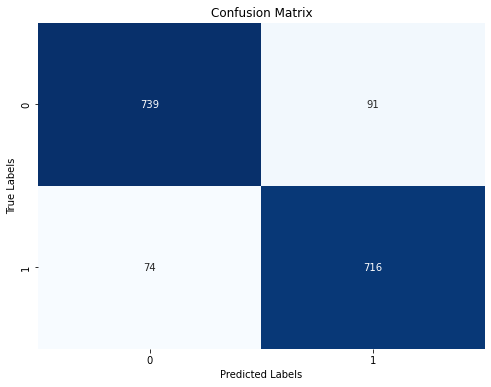

In [29]:
# Evaluasi Model

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot=True, cmap="Blues", fmt='d', cbar=False)

# Set labels and judul
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Tampilkan plot
plt.show()

**Interpretasi** <br>
Pada Confusion Matrix diatas diperoleh: <br>
1. Prediksi Benar:
- 739 (True Positives): Model dengan benar mengklasifikasikan 739 kelas sebagai positif.
- 716 (True Negatives): Model dengan benar mengklasifikasikan 716 kelas sebagai negatif. 
<br>
2. Prediksi Salah:
- 91 (False Positives): Model salah mengklasifikasikan 91 kelas sebagai positif, padahal seharusnya negatif.
- 74 (False Negatives): Model salah mengklasifikasikan 74 kelas sebagai negatif, padahal seharusnya positif.

In [30]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90       830
    Positive       0.89      0.91      0.90       790

    accuracy                           0.90      1620
   macro avg       0.90      0.90      0.90      1620
weighted avg       0.90      0.90      0.90      1620



In [31]:
# Akurasi Model Naive Bayes
print(metrics.accuracy_score(y_test, prediction))

0.8981481481481481


**Interpretasi** <br>
Dapat disimpulkan dari evaluasi model Naive Bayes tersebut diperoleh akurasi model sebesar 90% yang artinya model secara keseluruhan memiliki kinerja yang sangat baik. 

Kedua kelas (negatif dan positif) memiliki presisi dan recall yang sangat baik, sekitar 90%, menunjukkan bahwa model cukup andal dalam memprediksi kedua kelas tersebut.

F1-score yang konsisten (90%) untuk kedua kelas menunjukkan bahwa tidak ada bias yang signifikan terhadap salah satu kelas.

Model ini menunjukkan kinerja yang kuat dan konsisten dalam mengklasifikasikan data dengan presisi, recall, dan F1-score yang tinggi untuk kedua kelas, serta akurasi keseluruhan yang tinggi.

# Soal Teori

1. **Berikan penjelasan Anda mengenai perbedaan antara text classification dengan text clustering?** <br>
    Jawab : <br>
    Text classification adalah proses mengkategorikan teks ke dalam label atau kategori yang telah ditentukan sebelumnya. Model classification mempelajari hubungan antara teks dan label kategori berdasarkan data pelatihan yang telah diberi label. 
    Text classification adalah metode supervised learning, di mana model dilatih menggunakan data yang sudah diberi label. Model ini belajar dari data pelatihan yang berisi teks dan label yang sesuai, kemudian menerapkan pengetahuannya untuk mengklasifikasikan teks baru yang belum pernah dilihat sebelumnya. Output dari text classification yaitu Menghasilkan kategori atau label untuk setiap teks yang masuk. Setiap teks diberi satu atau lebih label dari set label yang telah ditentukan sebelumnya.

    Sedangkan, Text clustering adalah proses mengelompokkan teks yang serupa ke dalam kelompok (cluster) yang tidak diketahui sebelumnya. Ini adalah teknik unsupervised learning, di mana kelompok atau kategori tidak ditentukan sebelumnya. 
    Text clustering adalah metode unsupervised learning, yang berarti tidak ada label yang diberikan selama proses pelatihan. Algoritma clustering mencari pola dan struktur dalam data untuk mengelompokkan teks yang serupa. Output dari text clustering Menghasilkan sejumlah kelompok atau cluster, di mana teks-teks yang serupa dikumpulkan bersama dalam cluster yang sama. Tidak ada label yang ditetapkan sebelumnya untuk cluster ini.
<br>
2. **Kapan text clustering dapat dilakukan pada data teks? Jelaskan situasi atau kondisi di mana teknik ini bermanfaat dan berikan contoh kasus penggunaannya.** <br>
    Jawab : <br>
    Text clustering dapat dilakukan ketika ingin menemukan struktur atau pola dalam data teks tanpa mengetahui sebelumnya kategori apa yang mungkin ada. Teknik ini bermanfaat dalam situasi berikut: <br>
    **• Eksplorasi Data** : <br>
        - Kondisi: Ketika memiliki banyak data teks yang belum diberi label dan ingin memahami struktur atau distribusi 
                    data tersebut.
        - Manfaat: Membantu dalam memahami pola umum, tema, atau tren dalam data tanpa memerlukan label yang telah 
                    ditentukan sebelumnya.
        - Contoh Kasus: Seorang peneliti memiliki kumpulan besar artikel jurnal dan ingin mengetahui topik utama 
                        yang dibahas dalam artikel-artikel tersebut tanpa membaca satu per satu. Dengan text clustering,
                        peneliti dapat mengelompokkan artikel-artikel berdasarkan topik utama mereka, seperti bioteknologi,
                        kecerdasan buatan,atau perubahan iklim.
    **• Mengelompokkan Dokumen** : <br>
        - Kondisi: Ketika ada kebutuhan untuk mengelompokkan dokumen secara otomatis untuk kemudahan pencarian dan 
                   pengelolaan.
        - Manfaat: Mempermudah navigasi dan akses terhadap informasi dengan mengelompokkan dokumen serupa.
        - Contoh Kasus: Sebuah perpustakaan digital ingin mengorganisir ribuan buku elektronik berdasarkan tema atau genre.
                        Menggunakan text clustering, buku-buku dapat dikelompokkan ke dalam kategori seperti fiksi ilmiah,
                        sejarah, atau self-help.
    **• Analisis Sentimen** : <br>
        - Kondisi: Ketika ingin menganalisis umpan balik pelanggan atau ulasan produk untuk mengidentifikasi masalah utama 
                   tanpa menetapkan kategori sebelumnya.
        - Manfaat: Mengidentifikasi tren atau isu utama yang muncul dari umpan balik atau ulasan tanpa bias kategori yang 
                   telah ditentukan.
        - Contoh Kasus: Sebuah perusahaan e-commerce menerima ribuan ulasan produk setiap hari. Dengan text clustering,
                        perusahaan dapat mengelompokkan ulasan berdasarkan tema utama, seperti kualitas produk, pengiriman,
                        layanan pelanggan, dan harga, untuk memahami area mana yang memerlukan perhatian lebih.
    **• Sistem Rekomendasi** : <br>
        - Kondisi: Ketika ingin memberikan rekomendasi konten berdasarkan kesamaan dengan konten yang sudah ada atau yang 
                    pernah dilihat oleh pengguna.
        - Manfaat: Meningkatkan relevansi dan personalisasi rekomendasi dengan mengelompokkan konten serupa.
        - Contoh Kasus: Sebuah platform streaming video ingin merekomendasikan video yang mirip dengan video yang sudah 
                        ditonton oleh pengguna. Dengan text clustering, platform dapat mengelompokkan video berdasarkan 
                        deskripsi dan tag mereka, sehingga bisa merekomendasikan video dengan tema atau genre serupa.
<br>
3. **Jika menggunakan algoritma K-means untuk text clustering, bagaimana cara menentukan jumlah klaster optimal? Jelaskan dua metode yang umum digunakan untuk menentukan jumlah klaster optimal.** <br>
    Jawab : <br>
    Menentukan jumlah klaster optimal adalah langkah penting dalam algoritma K-means untuk text clustering. Dua metode yang 
    umum digunakan untuk menentukan jumlah klaster optimal adalah Metode Elbow dan Silhouette Score. 
    Berikut penjelasan secara detail dan lengkap tentang masing-masing metode: <br>
    **•	Metode Elbow** : <br>
    Metode Elbow adalah teknik visual untuk menentukan jumlah klaster optimal dengan mengevaluasi within-cluster 
    sum of squares (WCSS) atau inertia untuk berbagai nilai k (jumlah klaster). WCSS mengukur total kuadrat jarak 
    antara setiap titik data dan centroid klasternya. <br>
    Langkah:
        1. Jalankan K-means untuk berbagai nilai kkk (misalnya, dari 1 hingga 10).
        2. Plot nilai WCSS untuk setiap kkk.
        3. Tentukan titik di mana penurunan WCSS mulai melambat secara signifikan (membentuk 'siku'). Titik ini biasanya 
           dianggap sebagai jumlah klaster optimal. <br>
    **•	Metode Silhouette** : <br>
     Metode Silhouette mengukur seberapa mirip sebuah objek dengan klasternya sendiri dibandingkan dengan klaster lainnya.
     Skor silhouette berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa objek lebih sesuai dengan
     klasternya sendiri daripada dengan klaster lain.
     Langkah:
        1.	Jalankan K-means untuk berbagai nilai kkk.
        2.	Hitung skor silhouette rata-rata untuk setiap nilai kkk.
        3.	Plot skor silhouette rata-rata terhadap jumlah klaster kkk.
        4.	Pilih nilai kkk yang memberikan skor silhouette rata-rata tertinggi.



